Compare the new method to the previous one in terms of running time and result.
Each cell after the first one tests for one metric. 

Output displays running time in tqdm progress bar, where the first one (new) should be significantly shorter than the second (previous). 

The two plots show interbrain connectivity (32x32) for one frequency band for two methods respectively -- this should be a sanity check for correct computation.

Note: the new method is computing intra- and inter- brain connectivity at once, while the old one is only for interbrain. I only plotted interbrain.

Note 2: I made some corrections to the "original" functions since last time as well!

In [1]:
import os
from copy import copy
from collections import OrderedDict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import mne

# from hypyp.viz import transform
# from hypyp.viz import plot_sensors_2d, plot_links_2d
# from hypyp.viz import plot_sensors_3d, plot_links_3d
# from hypyp.prep import ICA_fit, ICA_choice_comp, AR_local
# from hypyp.analyses import compute_freq_bands, compute_sync
from HyPyP.hypyp import viz
from HyPyP.hypyp import analyses
from HyPyP.hypyp import prep

plt.ion()

# Frequency bands used in the study
freq_bands = {'Theta': [4, 7],
              'Alpha-Low': [7.5, 11],
              'Alpha-High': [11.5, 13],
              'Beta': [13.5, 29.5],
              'Gamma': [30, 48]}
freq_bands = OrderedDict(freq_bands)  # Force to keep order

path = 'E:/Dropbox\EPOCHS\Sackler_10.01.18\session1/'
# Loading data files & extracting sensor infos
epo1 = mne.read_epochs(os.path.join(path, "boscc_TALK_1_adult-epo.fif"), preload=True)
epo1 = epo1.drop_channels('STI 014')  # remove stim channel
loc1 = copy(np.array([ch['loc'][:3] for ch in epo1.info['chs']]))
lab1 = [ch + "_1" for ch in epo1.ch_names]

epo2 = mne.read_epochs(os.path.join(path, "boscc_TALK_1_kid-epo.fif"), preload=True)
epo2 = epo2.drop_channels('STI 014')  # remove stim channel
loc2 = copy(np.array([ch['loc'][:3] for ch in epo2.info['chs']]))
lab2 = [ch + "_2" for ch in epo2.ch_names]
loc2 = viz.transform(loc2)

# Equalize epochs size
mne.epochs.equalize_epoch_counts([epo1, epo2])

# Connectivity
# Create array
data = np.array([epo1.get_data(), epo2.get_data()])
complex_signal = analyses.compute_freq_bands(data, freq_bands)

c:\users\phoebe chen\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\phoebe chen\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\phoebe chen\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Reading E:/Dropbox\EPOCHS\Sackler_10.01.18\session1/boscc_TALK_1_adult-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
255 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Reading E:/Dropbox\EPOCHS\Sackler_10.01.18\session1/boscc_TALK_1_kid-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
255 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Dropped 0 epochs
Dropped 0 epochs


C:\Users\Phoebe Chen\PycharmProjects\syncpipeline\HyPyP\hypyp\analyses.py:474: RuntimeWarning: filter_length (827) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longer signal.
  for subject in range(2)  # for each subject
C:\Users\Phoebe Chen\PycharmProjects\syncpipeline\HyPyP\hypyp\analyses.py:474: RuntimeWarning: filter_length (827) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longer signal.
  for subject in range(2)  # for each subject
C:\Users\Phoebe Chen\PycharmProjects\syncpipeline\HyPyP\hypyp\analyses.py:474: RuntimeWarning: filter_length (827) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longer signal.
  for subject in range(2)  # for each subject
C:\Users\Phoebe Chen\PycharmProjects\syncpipeline\HyPyP\hypyp\analyses.py:474: RuntimeWarning: filter_length (827) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longe

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [01:25<00:00,  3.06it/s]


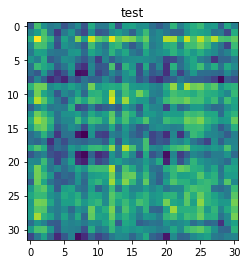

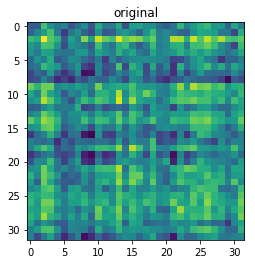

In [4]:
# PLV
mode = 'plv'
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [01:30<00:00,  2.62it/s]


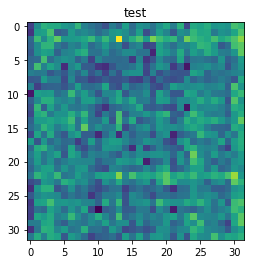

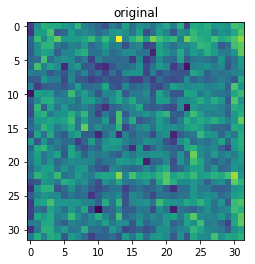

In [5]:
# CCORR
mode = 'ccorr'
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [02:56<00:00,  1.40it/s]


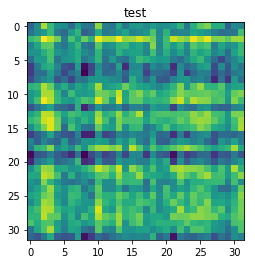

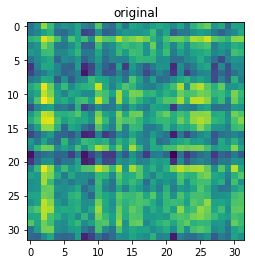

In [6]:
# Coherence
mode = 'coh'
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [02:44<00:00,  1.53it/s]


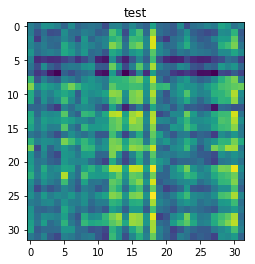

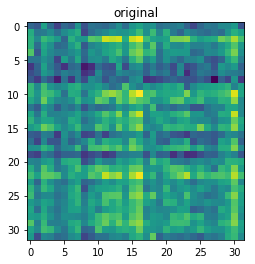

In [2]:
# Imaginary Coherence
mode = 'imagcoh'
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:18<00:00, 13.74it/s]


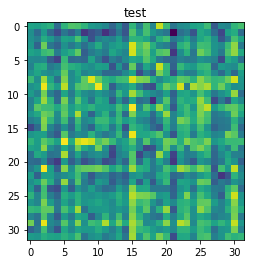

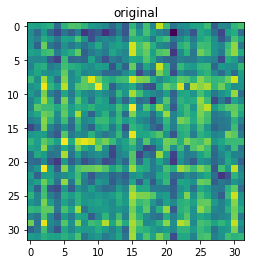

In [8]:
# envelope
mode = 'envelope'
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:49<00:00,  5.49it/s]


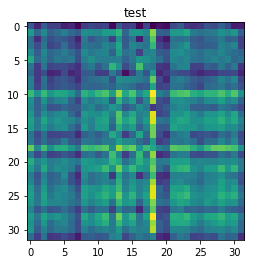

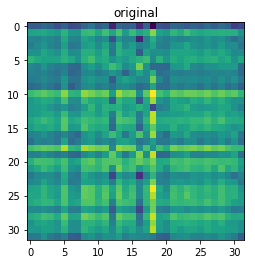

In [9]:
# Projected Power Corr
mode = 'proj'
test = analyses.compute_sync_test(complex_signal, mode, time_resolved=True)
original = analyses.compute_sync_new(complex_signal, mode, time_resolved=True)
plt.figure()
plt.title('test')
plt.imshow(test[0,0:32,32:64])
plt.figure()
plt.title('original')
plt.imshow(original[:,:,0])